In [2]:
%matplotlib inline

In [15]:
import numpy as np
import pandas as pd
import csv
from collections import Counter

In [4]:
from matplotlib import pyplot as plt

In [63]:
#plt.style.use('tableau-colorblind10')
plt.style.use('fivethirtyeight')

## Using standard csv module to read the csv file

In [25]:
with open('ProgLanguage.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    #row = next(csv_reader)
    #print(row['LanguageWorkedWith'].split(';'))
    language_counter = Counter()
    for row in csv_reader:
        language_counter.update(row['LanguageWorkedWith'].split(';'))
        

### Using list unpacking

In [50]:
print(language_counter)
print(type(language_counter))

language_counter_limit = language_counter.most_common(15)
print(type(language_counter_limit))
    
# language, no_of_people = zip(*language_counter.items())    Need to add items if dealing with collections
language, no_of_people = zip(*language_counter_limit)
print(type(language))
print(language)
print(no_of_people)

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})
<class 'collections.Counter'>
<class 'list'>
<class 'tuple'>
('JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly')
(59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833)


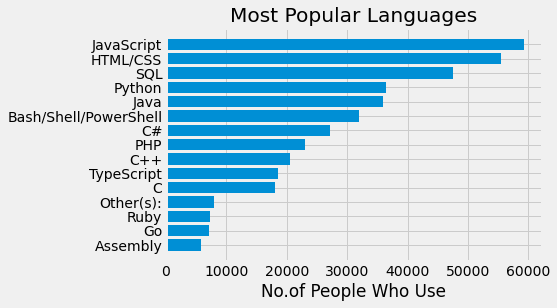

In [64]:
language = list(language)
language.reverse()
no_of_people = list(no_of_people)
no_of_people.reverse()
plt.barh(languages, no_of_peoples)
plt.title("Most Popular Languages")
plt.xlabel("No.of People Who Use")
plt.show()

### Using manual assignment

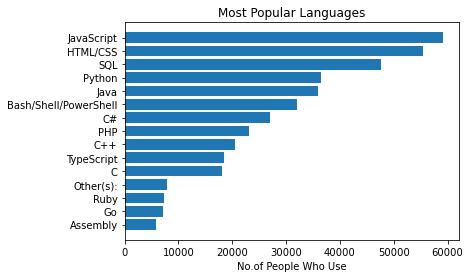

In [40]:
languages = []
popularity = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
    
languages.reverse()
popularity.reverse()
plt.barh(languages, popularity)
plt.title("Most Popular Languages")
plt.xlabel("No.of People Who Use")
plt.show()

## Using Pandas

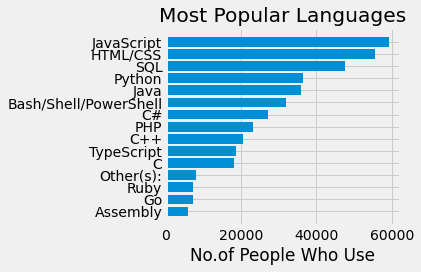

In [68]:
df = pd.read_csv('ProgLanguage.csv')
ids = df['Respondent']
lang_responses = df['LanguageWorkedWith']

language_counter = Counter()

for response in lang_responses:
        language_counter.update(response.split(';'))
        
languages = []
popularity = []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])
    
languages.reverse()
popularity.reverse()
plt.barh(languages, popularity)
plt.title("Most Popular Languages")
plt.xlabel("No.of People Who Use")
plt.tight_layout()
plt.show()

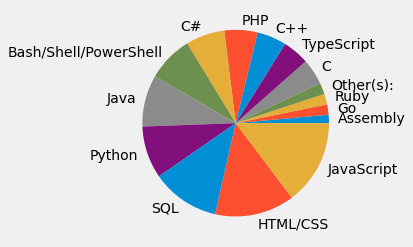

In [69]:
plt.pie(popularity, labels=languages)
plt.show()

# Open second dataset of Age, Salary, and Prog Language

In [76]:
df = pd.read_csv('AgeProgSal.csv')
age = df['Age']
overall_sal = df['All (SalaryUSD)']
python_sal = df['Python(SalaryUSD)']
javascript_sal = df['JS(SalaryUSD)']


In [73]:
df.head(10)

,Age,All (SalaryUSD),Python(SalaryUSD),JS(SalaryUSD)
0,18,13750.0,15396.0,14065.0
1,19,14506.0,15699.0,14784.0
2,20,16016.0,18444.0,17004.0
3,21,19236.0,20628.0,19794.0
4,22,23751.0,30000.0,24024.0
5,23,29400.0,36030.0,27492.0
6,24,33583.0,41244.0,34368.0
7,25,37837.0,45000.0,36668.0
8,26,41820.0,48108.0,42660.0
9,27,46272.0,53460.0,46000.0


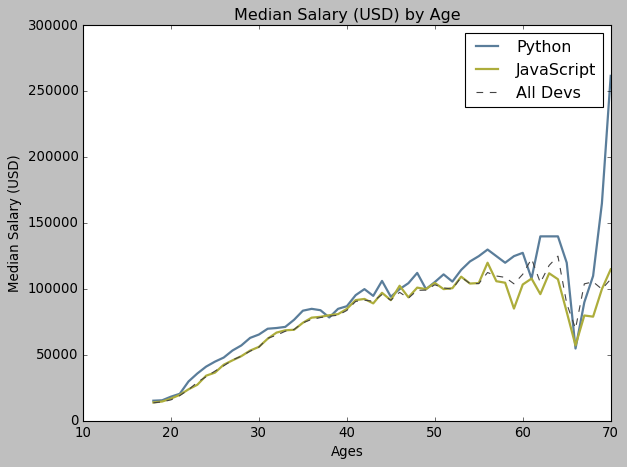

In [92]:
plt.style.use('classic')
plt.plot(age, python_sal, color='#5a7d9a', linewidth=2, label='Python')
plt.plot(age, javascript_sal, color='#adad3b', linewidth=2, label='JavaScript')
plt.plot(age, overall_sal, color='#444444', linestyle='--', label='All Devs')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.tight_layout()